In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





### 1. Accessing the Dataset

In [95]:
df_oracle_financials = pd.read_excel('OracleMicrosoftMixedReview.xlsx', sheet_name = 'Financial Data Oracle')
df_oracle_ratios = pd.read_excel('OracleMicrosoftMixedReview.xlsx', sheet_name = 'Ratio Calculation Oracle')

df_ms_financials = pd.read_excel('OracleMicrosoftMixedReview.xlsx', sheet_name = 'Financial Data Microsoft')
df_ms_ratios = pd.read_excel('OracleMicrosoftMixedReview.xlsx', sheet_name = 'Ratio Calculations Microsoft')

In [96]:
df_oracle_financials.head()

,Company,Item,2025,2024,reference page,remarks
0,ORACLE,Non Current Assets,143782,118422,64,NaN
1,ORACLE,Current Assets,24579,22554,64,NaN
2,ORACLE,Current Liablities,32554,31554,64,NaN
3,ORACLE,Total Assets,168361,140976,64,NaN
4,ORACLE,Non-Current Liablities,114749,100193,64,NaN


In [97]:
print(df_oracle_financials.head())
print(df_oracle_ratios.head())
print(df_ms_financials.head())
print(df_ms_ratios.head())


  Company                    Item    2025    2024 reference page remarks
0  ORACLE      Non Current Assets  143782  118422             64     NaN
1  ORACLE          Current Assets   24579   22554             64     NaN
2  ORACLE      Current Liablities   32554   31554             64     NaN
3  ORACLE            Total Assets  168361  140976             64     NaN
4  ORACLE  Non-Current Liablities  114749  100193             64     NaN
  Company Type of Ratio                          Name  \
0  ORACLE       Liquidy                 Current Ratio   
1  ORACLE       Liquidy           Quick Acidity Ratio   
2  ORACLE       Liquidy     Average Collection Period   
3  ORACLE       Liquidy  Accounts Receivable Turnover   
4  ORACLE       Liquidy            Inventory Turnover   

                                             Formula  Result for 2025  \
0                Current Assets / Current Liablities         0.755022   
1  (Current Assets - Inventory) / Current Liabili...         0.743682   


## 2. Combining the financials and ratios of both companies


In [98]:
df_financials_combined = pd.concat([df_oracle_financials, df_ms_financials], ignore_index=True)
df_ratios_combined = pd.concat([df_oracle_ratios, df_ms_ratios], ignore_index=True)


In [99]:
df_ratios_combined

,Company,Type of Ratio,Name,Formula,Result for 2025,Result for 2024,remarks,Remarks
0,ORACLE,Liquidy,Current Ratio,Current Assets / Current Liablities,0.755022,0.714775,NaN,NaN
1,ORACLE,Liquidy,Quick Acidity Ratio,(Current Assets - Inventory) / Current Liabili...,0.743682,0.704413,NaN,NaN
2,ORACLE,Liquidy,Average Collection Period,365 * Accounts Receivable / Annual Credit Sales,54.420286,54.266536,couldn't find annual credit sales; based on re...,NaN
3,ORACLE,Liquidy,Accounts Receivable Turnover,Annual Credit Sales / Accounts Receivable,6.707058,6.726060,couldn't find annual credit sales; based on re...,NaN
4,ORACLE,Liquidy,Inventory Turnover,Costs of Goods Sold / Inventory,55.871287,45.350299,NaN,NaN
5,ORACLE,Capital Structure,Debt Ratio,Total Debt / Total Assets,0.875452,0.934464,NaN,NaN
6,ORACLE,Capital Structure,Times Interest Earned,Net Operational Income / Interest Expense,18.075665,17.486333,NaN,NaN
7,ORACLE,Asset Management Efficiency Ratios,Total Asset Turnover,Sales / Total Assets,0.340928,0.375674,NaN,NaN
8,ORACLE,Asset Management Efficiency Ratios,Fixed Asset Turnover,Sales / Net Plant and Equipment,1.318850,2.459185,NaN,NaN
9,ORACLE,Profitability Ratios,Gross Profit Margin,Gross Profits / Sales,0.705065,0.713997,NaN,NaN


## 3. Renaming Year Columns, and copying the data sets

In [100]:
financials = df_financials_combined # combining financials
ratios = df_ratios_combined
financials = financials.rename(columns={ # renaming columns
    2025: "Financials in 2025",
    2024: "Financials in 2024"
})

ratios = ratios.rename(columns={
    "Result for 2024": "Financials in 2024",
    "Result for 2025": "Financials in 2025"
})


## 4. Ratio Viz.
### a) Liquidity Ratios

In [101]:
def plot_ratio_group(df, ratio_keywords, title_prefix):
    subset = df[df["Name"].str.lower().str.contains(ratio_keywords)]

    for year in ["Financials in 2024", "Financials in 2025"]:
        year_val = 2024 if "2024" in year else 2025

        plt.figure(figsize=(7,5))

        labels = subset["Name"].unique()
        companies = subset["Company"].unique()

        # create data structure
        values = []
        for ratio in labels:
            row = subset[subset["Name"] == ratio]
            values.append([row[row["Company"] == comp][year].values[0] for comp in companies])

        # plot
        x = range(len(labels))
        width = 0.35

        for i, comp in enumerate(companies):
            plt.bar([p + i*width for p in x],
                    [v[i] for v in values],
                    width=width,
                    label=comp)

        plt.xticks([p + width/2 for p in x], labels, rotation=45, ha="right")
        plt.title(f"{title_prefix} – {year_val}")
        plt.ylabel("Ratio Value")
        plt.legend()
        plt.tight_layout()
        plt.show()


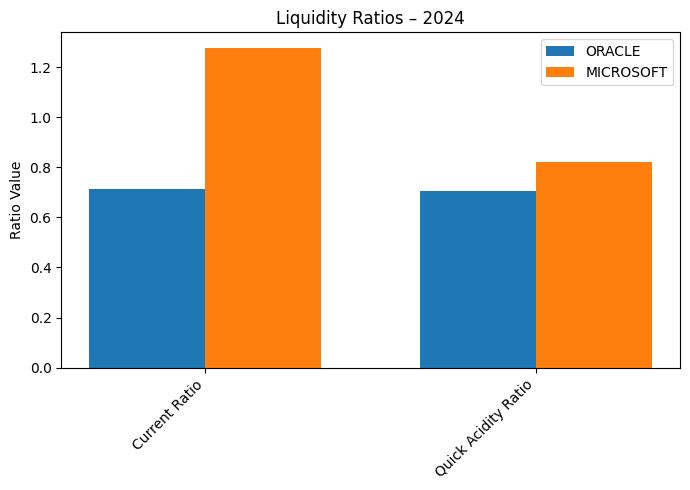

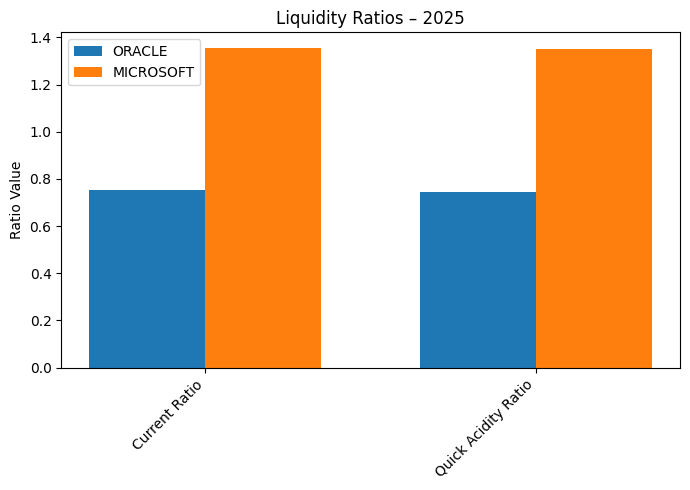

In [102]:
plot_ratio_group(ratios, "current|quick", "Liquidity Ratios")


### b) Efficiency Ratios

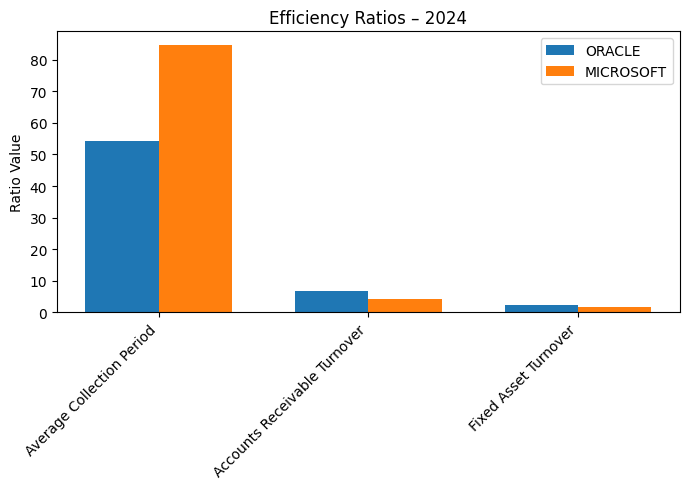

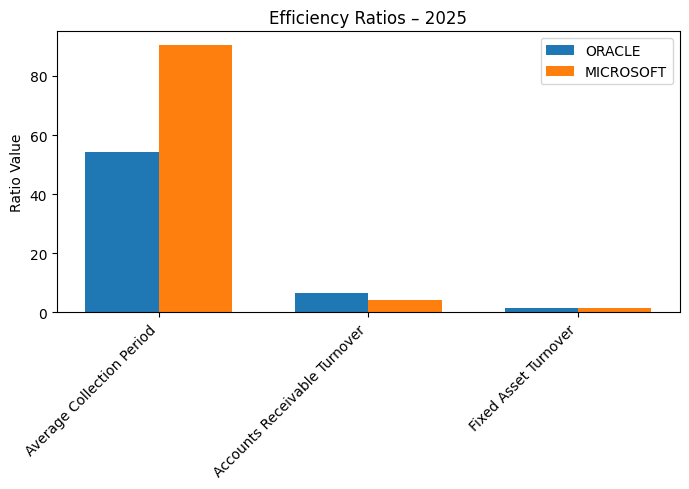

In [103]:
plot_ratio_group(ratios, "receivable|collection|fixed", "Efficiency Ratios")


### c) Profitability Ratios

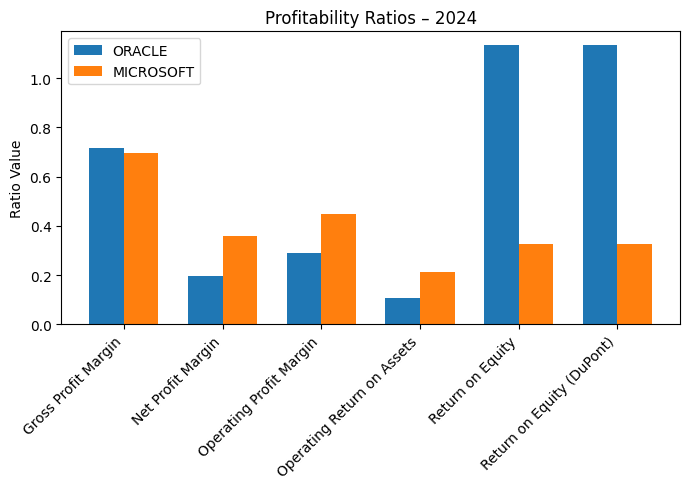

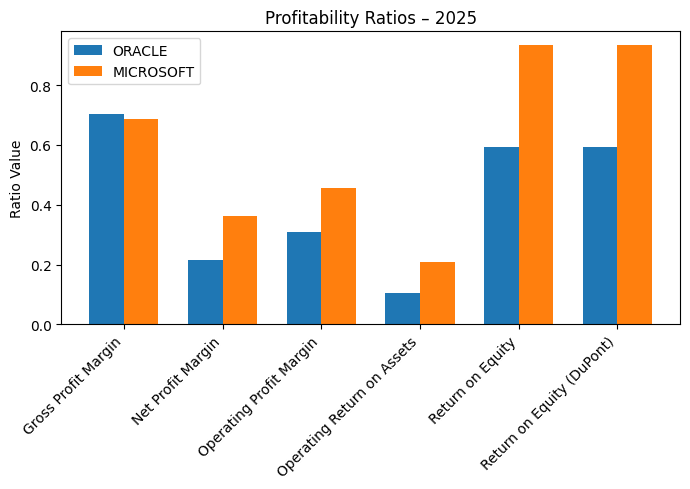

In [104]:
plot_ratio_group(ratios, "margin|return", "Profitability Ratios")


### d) Market Ratios

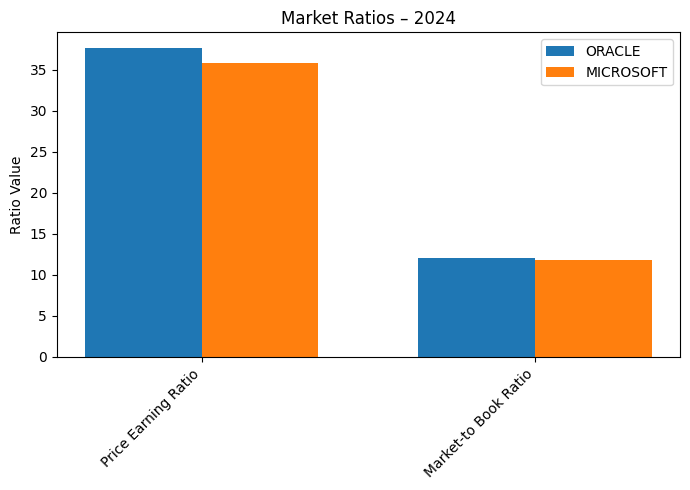

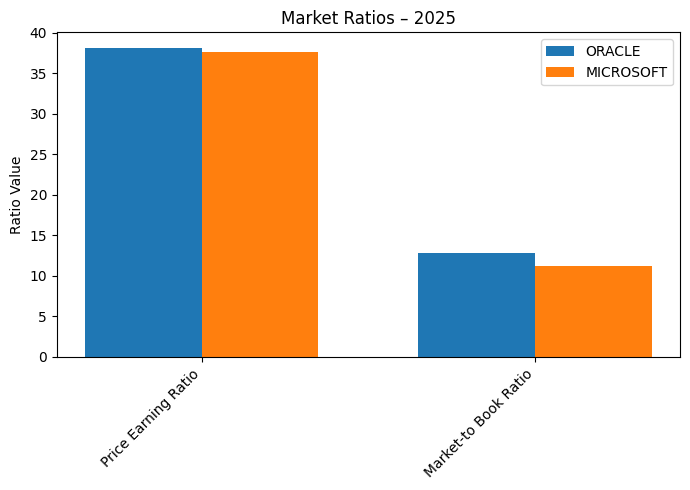

In [105]:
plot_ratio_group(ratios, "earning|market", "Market Ratios")


## e) Dupont Analysis


=== WATERFALL 2024 ===


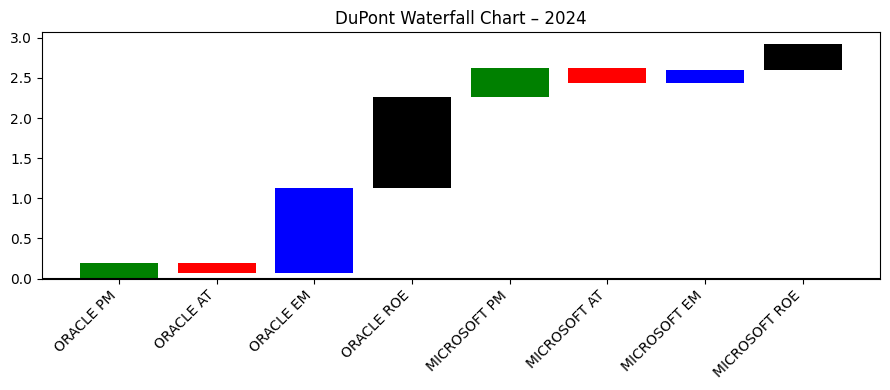


=== SIDE BY SIDE 2024 ===


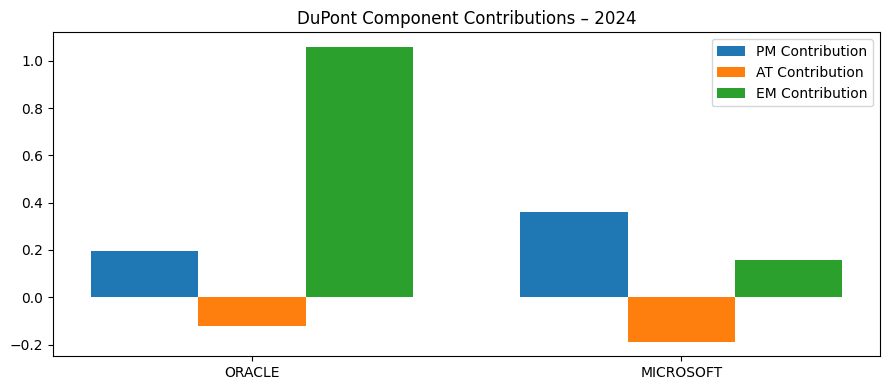


=== RAW RATIOS 2024 ===


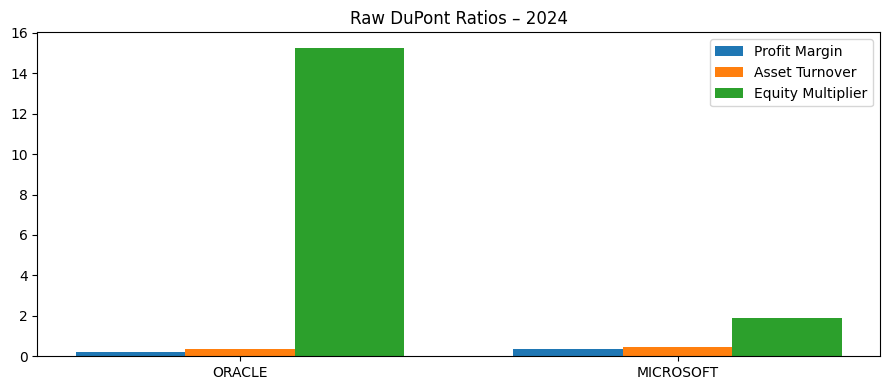


=== FULL MULTI-CHART 2024 ===


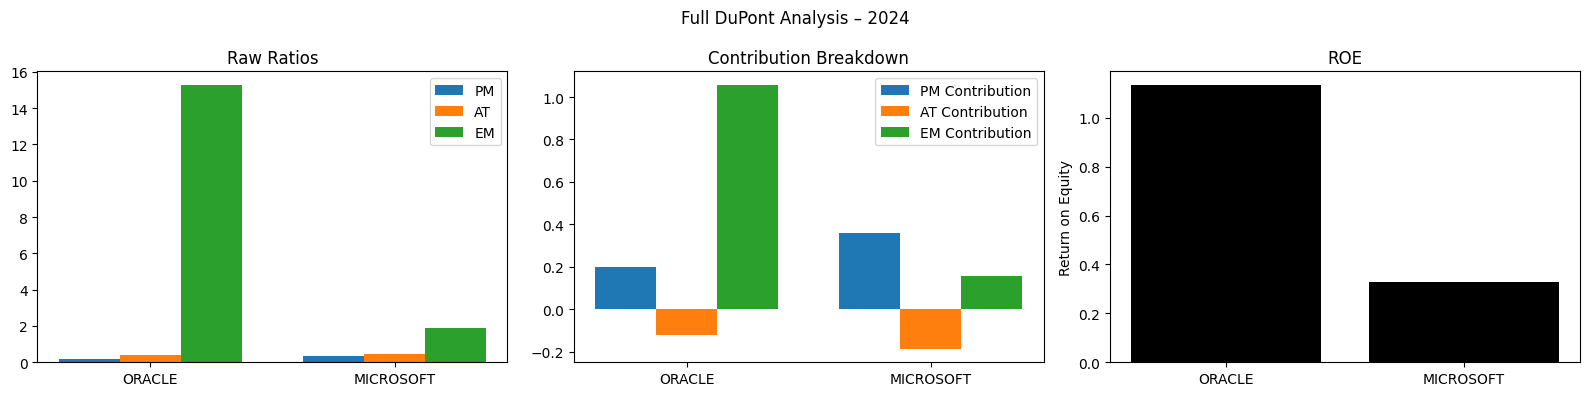


=== WATERFALL 2025 ===


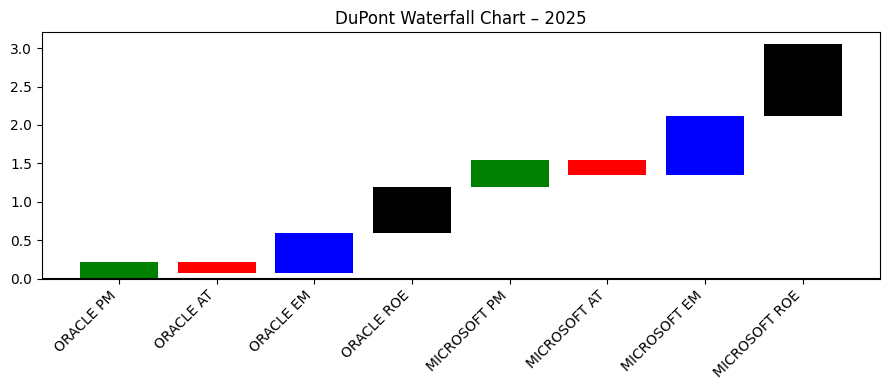


=== SIDE BY SIDE 2025 ===


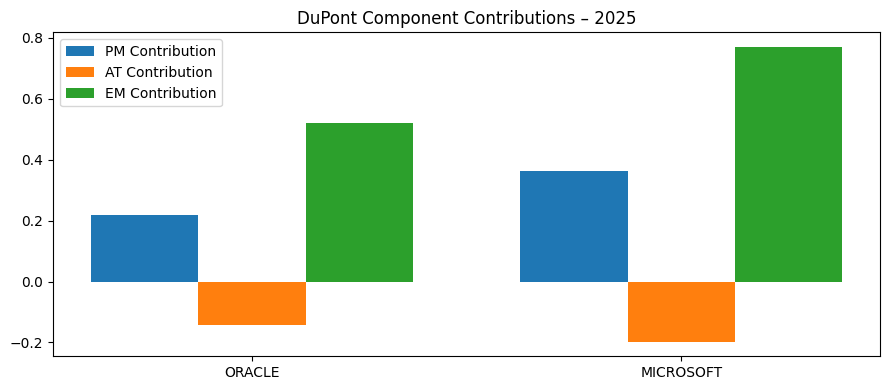


=== RAW RATIOS 2025 ===


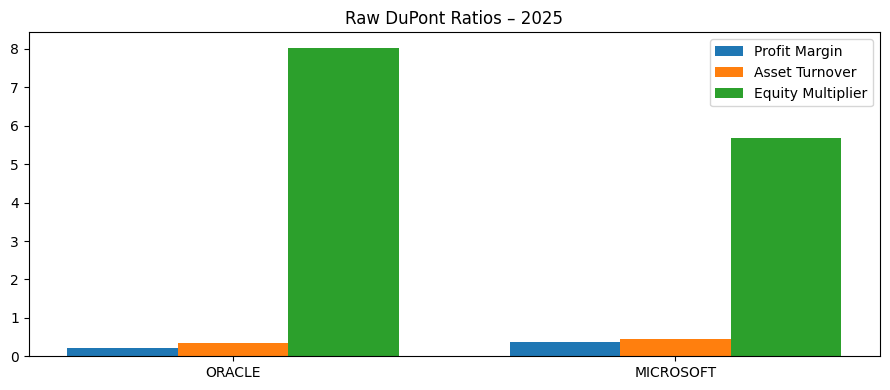


=== FULL MULTI-CHART 2025 ===


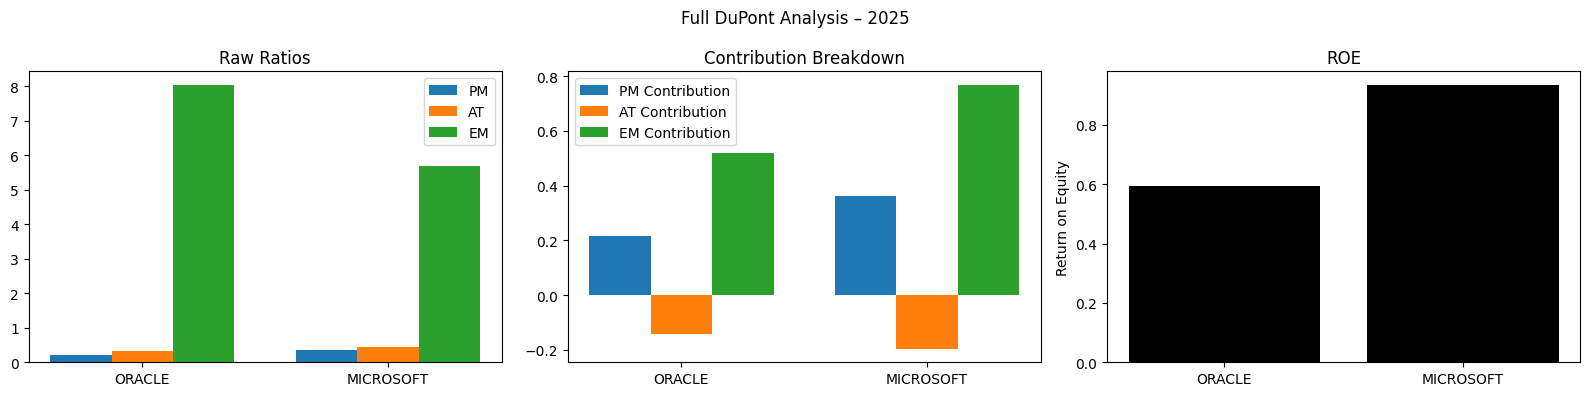

In [106]:
profit_name = "Net Profit Margin"
turnover_name = "Total Asset Turnover"
multiplier_name = "Equity Multiplier"


# =======================================================
# Helper function to extract DuPont components for a year
# =======================================================
def get_dupont(company, year):
    ycol = f"Financials in {year}"
    df = ratios[ratios["Company"] == company]

    pm = df[df["Name"] == profit_name][ycol].values[0]
    at = df[df["Name"] == turnover_name][ycol].values[0]
    em = df[df["Name"] == multiplier_name][ycol].values[0]

    roe = pm * at * em

    # contributions (note: AT component is negative)
    pm_c = pm
    at_c = pm * at - pm
    em_c = roe - (pm * at)

    return pm, at, em, roe, pm_c, at_c, em_c


companies = ["ORACLE", "MICROSOFT"]


# ==========================================
# A) WATERFALL DUPONT CHART
# ==========================================
def plot_waterfall(year):
    fig, ax = plt.subplots(figsize=(9,4))

    x_labels = []
    values = []

    for c in companies:
        pm, at, em, roe, pm_c, at_c, em_c = get_dupont(c, year)

        x_labels += [f"{c} PM", f"{c} AT", f"{c} EM", f"{c} ROE"]
        values += [pm_c, at_c, em_c, roe]

    cum = np.cumsum([0] + values[:-1])

    colors = ["green", "red", "blue", "black"] * len(companies)

    ax.bar(range(len(values)), values, bottom=cum, color=colors)
    ax.set_xticks(range(len(values)))
    ax.set_xticklabels(x_labels, rotation=45, ha="right")
    ax.set_title(f"DuPont Waterfall Chart – {year}")
    ax.axhline(0, color='black')
    plt.tight_layout()
    plt.show()


# ==========================================
# B) SIDE-BY-SIDE CONTRIBUTION BARS
# ==========================================
def plot_side_by_side(year):
    pm_vals = []
    at_vals = []
    em_vals = []

    for c in companies:
        pm, at, em, roe, pm_c, at_c, em_c = get_dupont(c, year)
        pm_vals.append(pm_c)
        at_vals.append(at_c)
        em_vals.append(em_c)

    x = np.arange(len(companies))
    w = 0.25

    plt.figure(figsize=(9,4))
    plt.bar(x - w, pm_vals, width=w, label="PM Contribution")
    plt.bar(x,     at_vals, width=w, label="AT Contribution")
    plt.bar(x + w, em_vals, width=w, label="EM Contribution")

    plt.xticks(x, companies)
    plt.title(f"DuPont Component Contributions – {year}")
    plt.legend()
    plt.tight_layout()
    plt.show()


# ==========================================
# C) RAW PM / AT / EM RATIOS
# ==========================================
def plot_raw_ratios(year):
    pm_vals = []
    at_vals = []
    em_vals = []

    for c in companies:
        pm, at, em, roe, *_ = get_dupont(c, year)
        pm_vals.append(pm)
        at_vals.append(at)
        em_vals.append(em)

    x = np.arange(len(companies))
    w = 0.25

    plt.figure(figsize=(9,4))
    plt.bar(x - w, pm_vals, width=w, label="Profit Margin")
    plt.bar(x,     at_vals, width=w, label="Asset Turnover")
    plt.bar(x + w, em_vals, width=w, label="Equity Multiplier")

    plt.xticks(x, companies)
    plt.title(f"Raw DuPont Ratios – {year}")
    plt.legend()
    plt.tight_layout()
    plt.show()


# ==========================================
# D) FULL COMBINED MULTI-CHART VISUALIZATION
# ==========================================
def plot_full_dupont(year):
    fig, axes = plt.subplots(1, 3, figsize=(16,4))

    # 1. PM / AT / EM raw
    pm_vals, at_vals, em_vals = [], [], []
    for c in companies:
        pm, at, em, _, *_ = get_dupont(c, year)
        pm_vals.append(pm)
        at_vals.append(at)
        em_vals.append(em)

    x = np.arange(len(companies))
    w = 0.25

    axes[0].bar(x - w, pm_vals, width=w, label="PM")
    axes[0].bar(x,     at_vals, width=w, label="AT")
    axes[0].bar(x + w, em_vals, width=w, label="EM")
    axes[0].set_title("Raw Ratios")
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(companies)
    axes[0].legend()

    # 2. Contribution bars
    pmv, atv, emv = [], [], []
    for c in companies:
        _, _, _, _, pm_c, at_c, em_c = get_dupont(c, year)
        pmv.append(pm_c)
        atv.append(at_c)
        emv.append(em_c)

    axes[1].bar(x - w, pmv, width=w, label="PM Contribution")
    axes[1].bar(x,     atv, width=w, label="AT Contribution")
    axes[1].bar(x + w, emv, width=w, label="EM Contribution")
    axes[1].set_title("Contribution Breakdown")
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(companies)
    axes[1].legend()

    # 3. ROE
    roe_vals = []
    for c in companies:
        _, _, _, roe, *_ = get_dupont(c, year)
        roe_vals.append(roe)

    axes[2].bar(companies, roe_vals, color="black")
    axes[2].set_title("ROE")
    axes[2].set_ylabel("Return on Equity")

    plt.suptitle(f"Full DuPont Analysis – {year}")
    plt.tight_layout()
    plt.show()


# ========================================================
# RUN ALL VISUALIZATIONS FOR BOTH YEARS
# ========================================================

for y in [2024, 2025]:
    print(f"\n=== WATERFALL {y} ===")
    plot_waterfall(y)

    print(f"\n=== SIDE BY SIDE {y} ===")
    plot_side_by_side(y)

    print(f"\n=== RAW RATIOS {y} ===")
    plot_raw_ratios(y)

    print(f"\n=== FULL MULTI-CHART {y} ===")
    plot_full_dupont(y)
